# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
  * ...

In [ ]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
import multiprocessing

## 분류를 위한 데이터

### 붓꽃 데이터

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df

### 와인 데이터

In [ ]:
wine = load_wine()

In [ ]:
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['Target'] = wine.target
wine_df

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

## 회귀를 위한 데이터

### 보스턴 주택 가격 데이터

In [ ]:
boston = load_boston()

In [ ]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['Target'] = boston.target
boston_df

### 당뇨병 데이터

In [ ]:
diabetes = load_diabetes()

In [ ]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['Target'] = diabetes.target
diabetes_df

## 분류 - `DecisionTreeClassifier()`

* `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
* 두개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

In [44]:
X = [[0,0],[1,1]]
y = [0,1]

model = tree.DecisionTreeClassifier()
model = model.fit(X, y)

In [45]:
model.predict([[2., 2.,]])

array([1])

In [46]:
model.predict_proba([[2., 2.,]])

array([[0., 1.]])

### 붓꽃 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [47]:
model = DecisionTreeClassifier()

In [48]:
cross_val_score(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [49]:
model = make_pipeline(
    StandardScaler(), DecisionTreeClassifier()
)

In [50]:
cross_val_score(
    estimator = model,
    X = iris.data, y = iris.target,
    cv=5, n_jobs = multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

#### 학습된 결정 트리 시각화

In [51]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [52]:
r = tree.export_text(decision_tree=model, feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

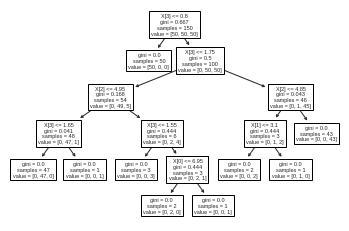

In [53]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

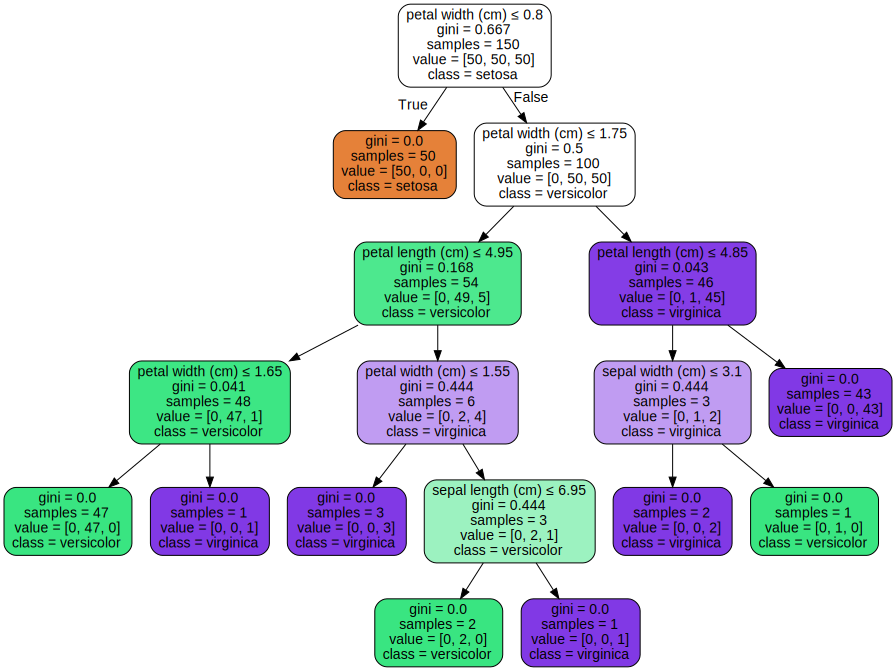

In [54]:
dot_data = tree.export_graphviz(decision_tree = model, feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled=True, rounded=True,special_characters=True
                                )
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [55]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(0.0, 7.88, -0.9, 3.4800000000000044)

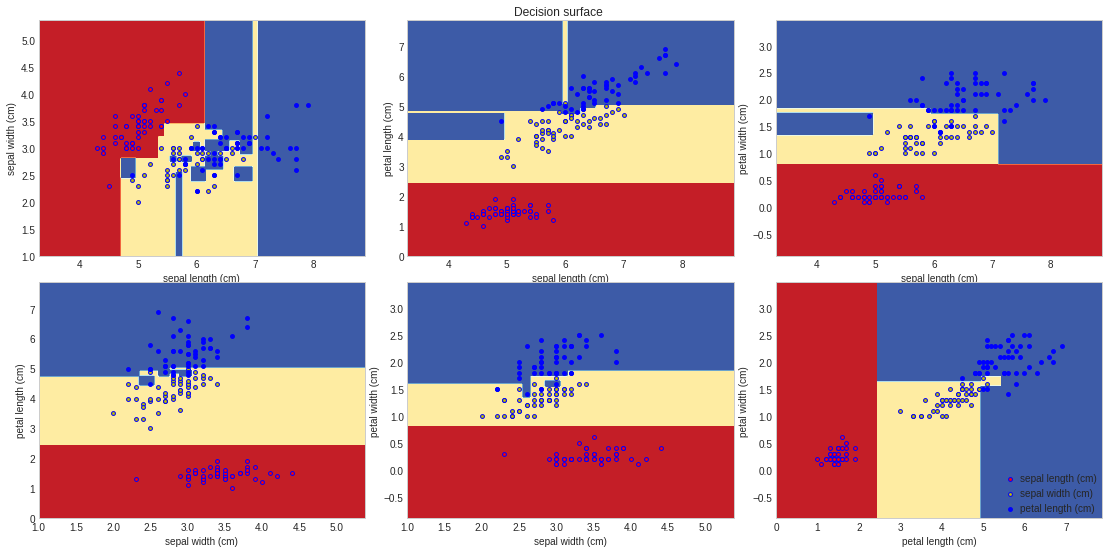

In [56]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
  X = iris.data[:,pair]
  y = iris.target

  model = DecisionTreeClassifier()
  model = model.fit(X, y)

  plt.subplot(2,3, pairidx + 1)

  x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.feature_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

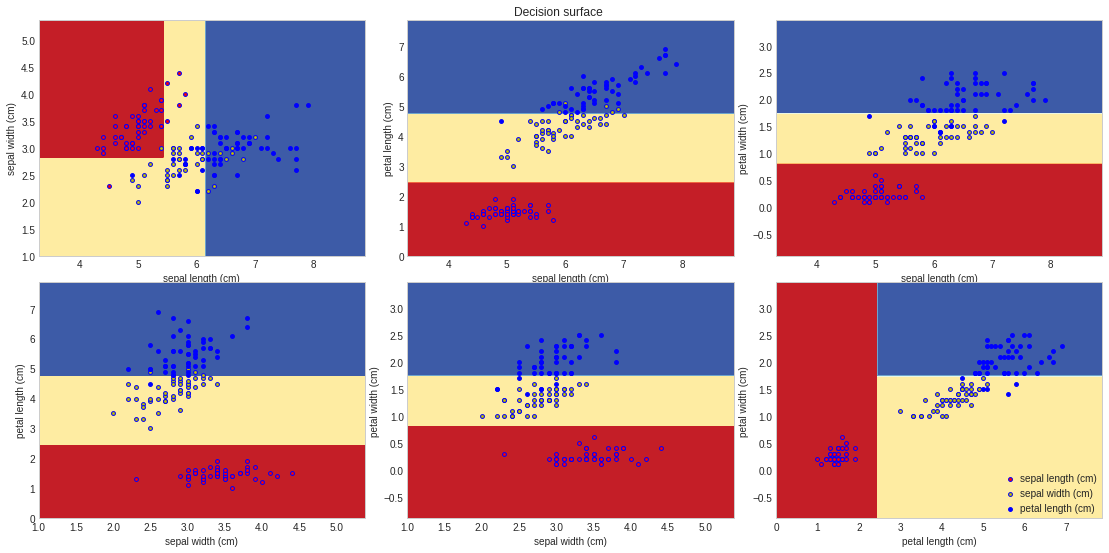

In [57]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
  X = iris.data[:,pair]
  y = iris.target

  model = DecisionTreeClassifier(max_depth=2)
  model = model.fit(X, y)

  plt.subplot(2,3, pairidx + 1)

  x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.feature_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 와인 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [58]:
model = DecisionTreeClassifier()

In [59]:
cross_val_score(estimator=model, X=wine.data, y=wine.target, cv=5, n_jobs=multiprocessing.cpu_count())

array([0.88888889, 0.77777778, 0.88888889, 0.91428571, 0.85714286])

##### 전처리 후 학습

In [60]:
model = make_pipeline(
    StandardScaler(), DecisionTreeClassifier()
)

In [61]:
cross_val_score(
    estimator = model, X = wine.data, y = wine.target, cv=5, n_jobs = multiprocessing.cpu_count()
)

array([0.91666667, 0.80555556, 0.86111111, 0.91428571, 0.85714286])

#### 학습된 결정 트리 시각화

In [62]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [63]:
r = tree.export_text(decision_tree=model, feature_names = wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- color_intensity <= 5.82
|   |   |   |   |--- class: 1
|   |   |   |--- color_intensity >  5.82
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- malic_acid <= 2.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- malic_acid >  2.12
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- malic_acid <= 2.08
|   |   |   |--- class: 1
|   |   |--- malic_acid >  2.08
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- color_intensity <

##### plot_tree를 사용한 시각화

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[9] <= 5.815\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.42105

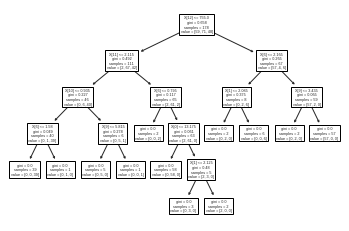

In [64]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

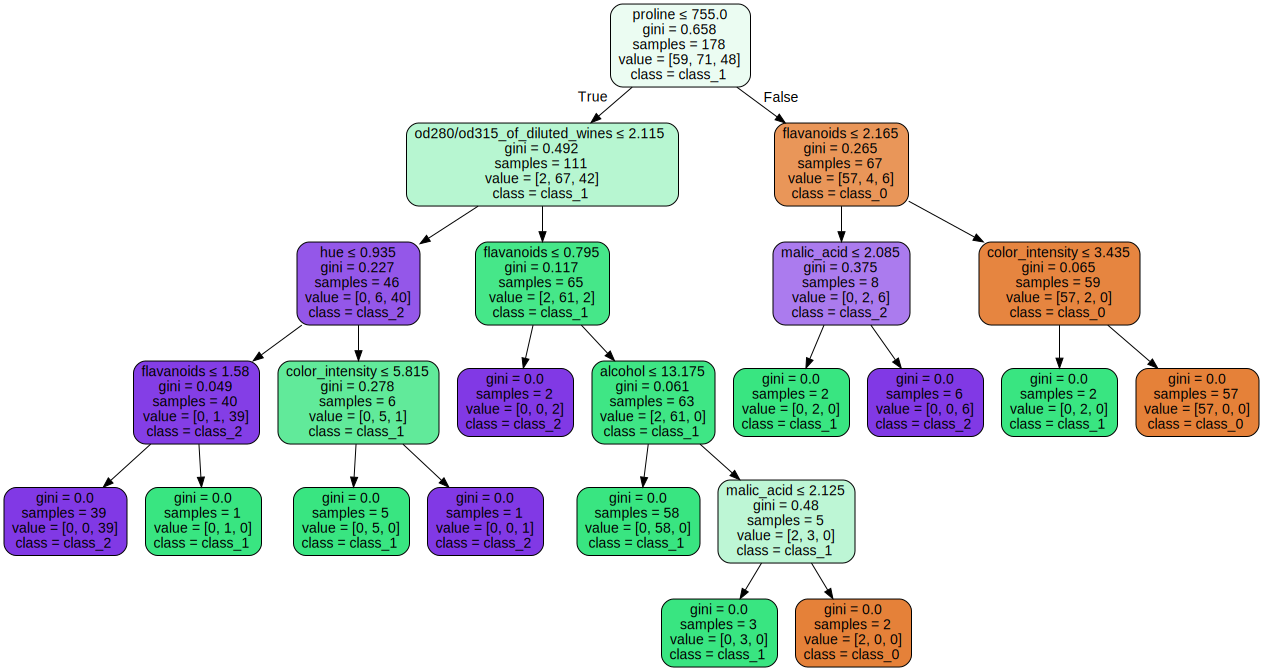

In [65]:
dot_data = tree.export_graphviz(decision_tree=model, feature_names=wine.feature_names, class_names = wine.target_names,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [66]:
c_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

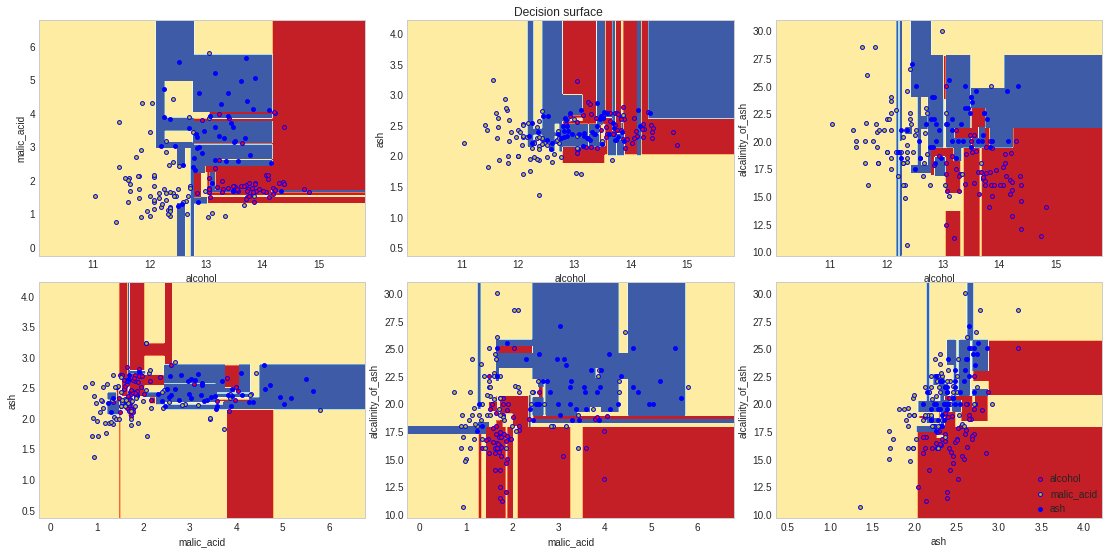

In [67]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
  X = wine.data[:,pair]
  y = wine.target

  model = DecisionTreeClassifier()
  model = model.fit(X, y)

  plt.subplot(2,3, pairidx + 1)

  x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.feature_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

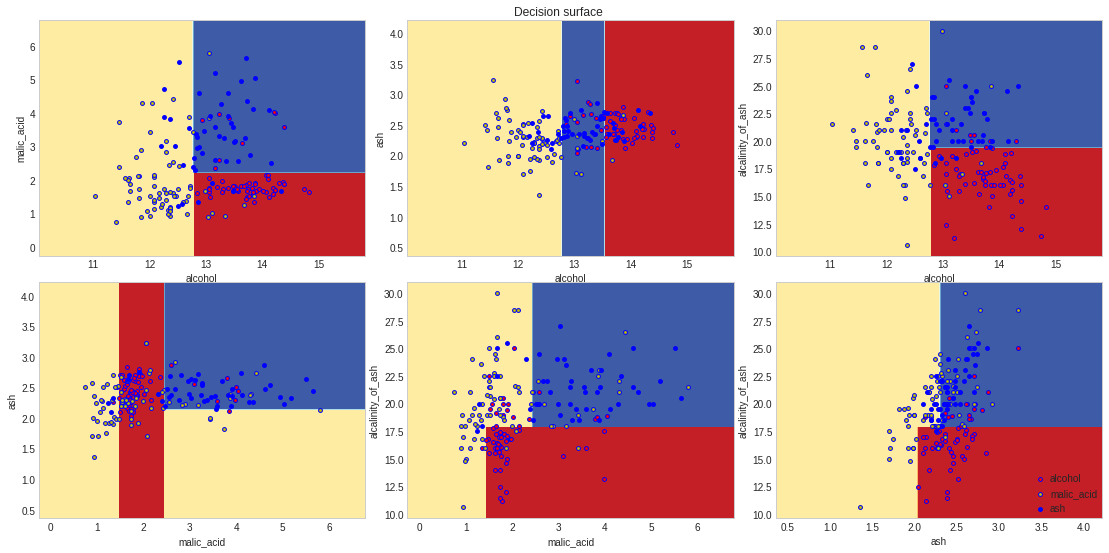

In [68]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
  X = wine.data[:,pair]
  y = wine.target

  model = DecisionTreeClassifier(max_depth = 2)
  model = model.fit(X, y)

  plt.subplot(2,3, pairidx + 1)

  x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.feature_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 유방암 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [69]:
model = DecisionTreeClassifier()

In [70]:
cross_val_score(estimator=model, X=cancer.data, y=cancer.target, cv=5, n_jobs=multiprocessing.cpu_count())

array([0.9122807 , 0.90350877, 0.92982456, 0.94736842, 0.89380531])

##### 전처리 후 학습

In [71]:
model = make_pipeline(StandardScaler(), DecisionTreeClassifier())

In [72]:
cross_val_score(estimator=model, X=cancer.data, y=cancer.target, cv=5, n_jobs=multiprocessing.cpu_count())

array([0.90350877, 0.9122807 , 0.92105263, 0.95614035, 0.87610619])

#### 학습된 결정 트리 시각화

In [73]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [74]:
r = tree.export_text(decision_tree=model)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_10 <= 1.05
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_25 <= 0.08
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_25 >  0.08
|   |   |   |   |   |--- feature_27 <= 0.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_27 >  0.12
|   |   |   |   |   |   |--- class: 0
|   |   |

##### plot_tree를 사용한 시각화

[Text(0.625, 0.9375, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.40625, 0.8125, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.234375, 0.6875, 'X[10] <= 1.048\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.203125, 0.5625, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'X[14] <= 0.003\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'X[21] <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.0625, 'gi

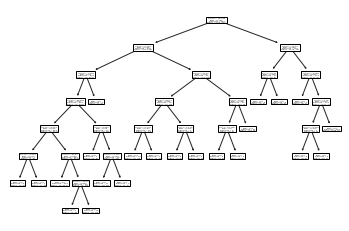

In [75]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

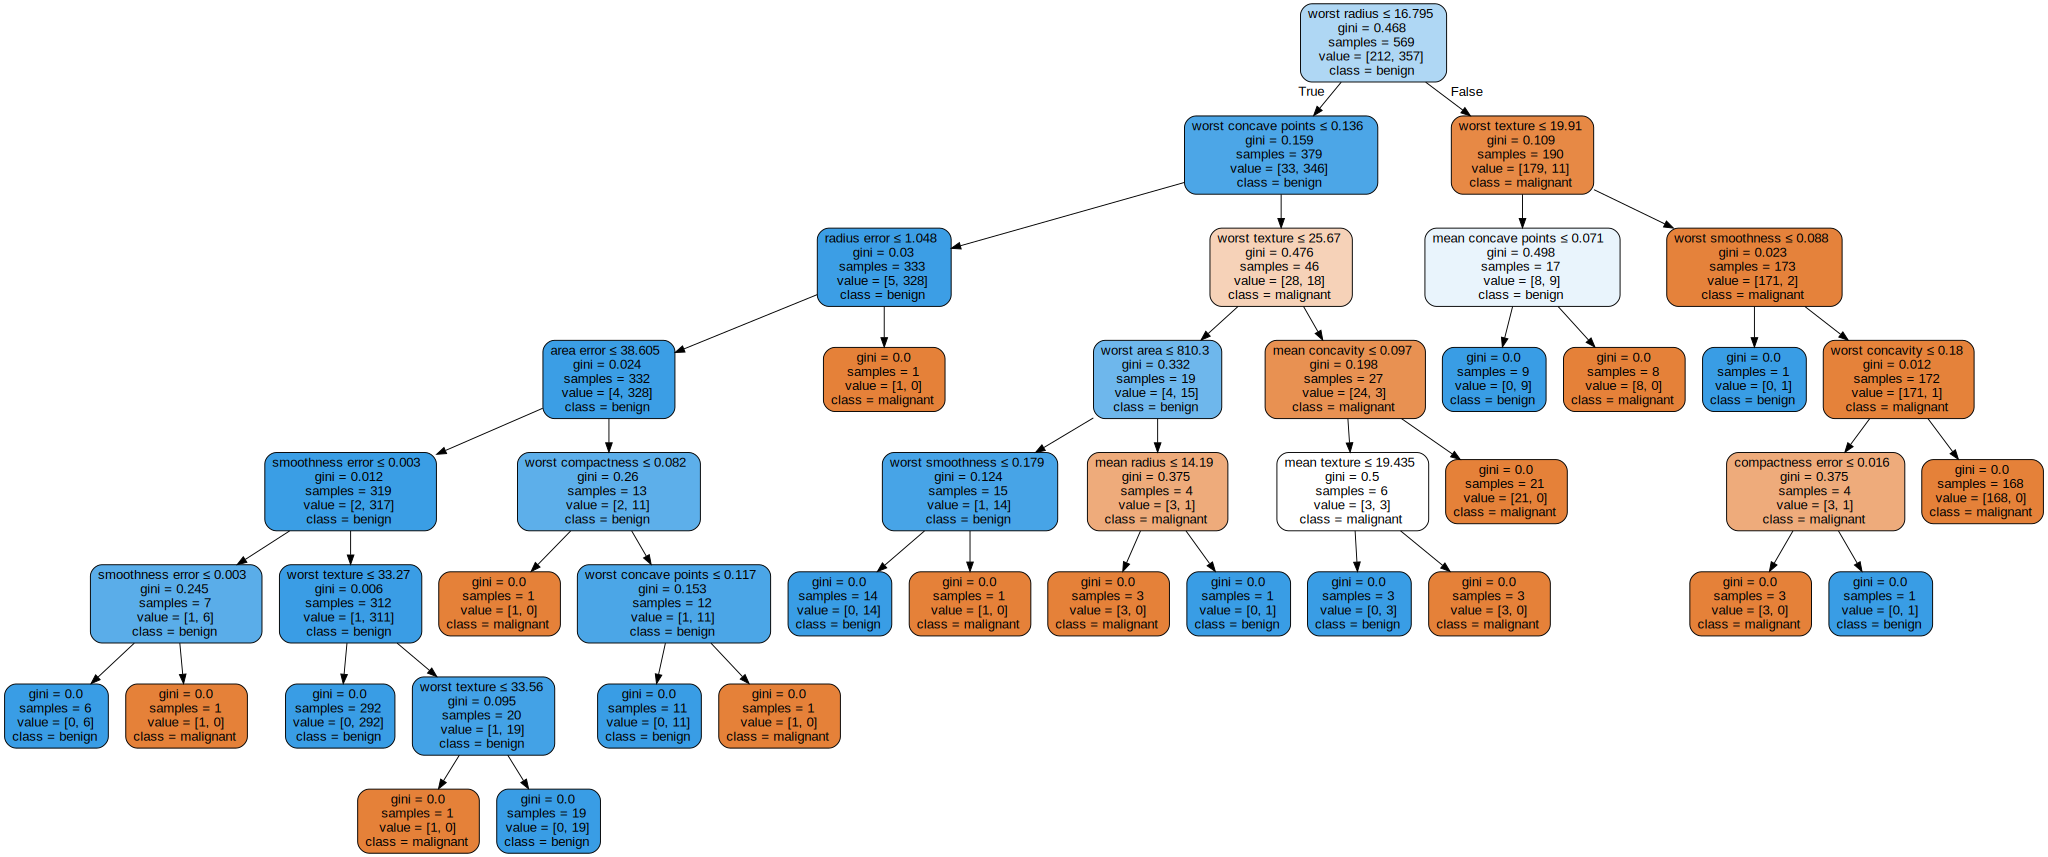

In [76]:
dot_data = tree.export_graphviz(decision_tree=model, feature_names = cancer.feature_names, class_names = cancer.target_names,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [77]:
n_classes = 2
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

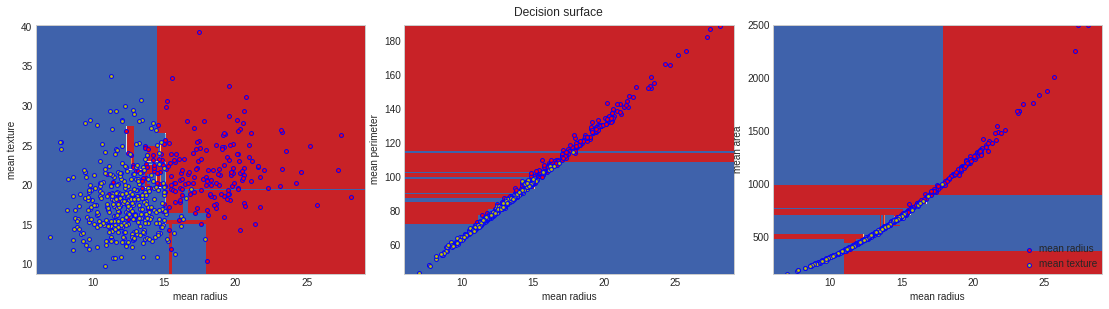

In [78]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3]]):
  X = cancer.data[:,pair]
  y = cancer.target

  model = DecisionTreeClassifier()
  model = model.fit(X, y)

  plt.subplot(2,3, pairidx + 1)

  x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.feature_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

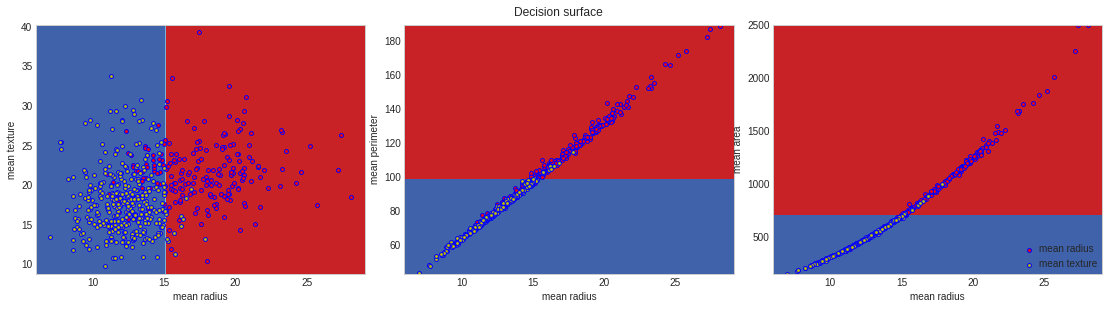

In [79]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3]]):
  X = cancer.data[:,pair]
  y = cancer.target

  model = DecisionTreeClassifier(max_depth=2)
  model = model.fit(X, y)

  plt.subplot(2,3, pairidx + 1)

  x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.feature_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [80]:
model = DecisionTreeRegressor()

In [81]:
cross_val_score(estimator = model, X = boston.data, y = boston.target, cv=5, n_jobs = multiprocessing.cpu_count())

array([ 0.63163467,  0.61259798,  0.64437651,  0.39448105, -1.78541904])

##### 전처리 후 학습

In [82]:
model = make_pipeline(StandardScaler(), DecisionTreeRegressor())

In [83]:
cross_val_score(estimator = model, X = boston.data, y = boston.target, cv=5, n_jobs = multiprocessing.cpu_count())

array([ 0.62494925,  0.6796289 ,  0.65292041,  0.37540419, -1.84187576])

#### 학습된 결정 트리 시각화

In [84]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [86]:
print(tree.export_text(model))

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 75.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  75.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |--- feat

##### plot_tree를 사용한 시각화

[Text(0.6772425768543796, 0.975, 'X[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.42047028382028345, 0.925, 'X[12] <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.18547472191565986, 0.875, 'X[7] <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.10466099848977695, 0.825, 'X[12] <= 10.83\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.1028022624302974, 0.775, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.1065197345492565, 0.775, 'squared_error = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.2662884453415427, 0.825, 'X[5] <= 6.543\nsquared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(0.11023720666821561, 0.775, 'X[12] <= 7.57\nsquared_error = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(0.042024860594795536, 0.725, 'X[9] <= 222.5\nsquared_error = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(0.040166124535315983, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(0

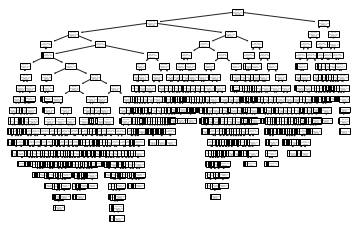

In [87]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

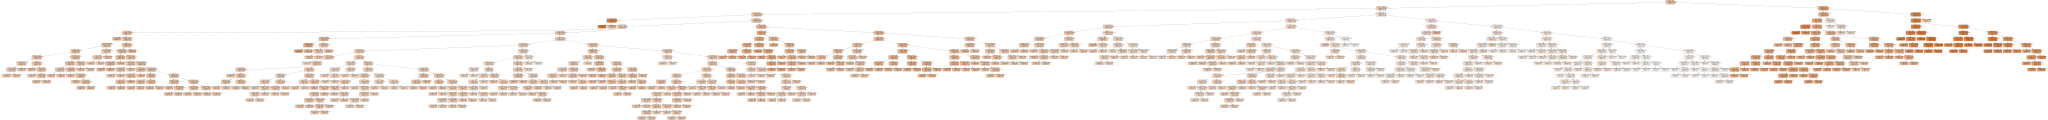

In [89]:
dot_data = tree.export_graphviz(decision_tree=model, feature_names = boston.feature_names,
                                filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

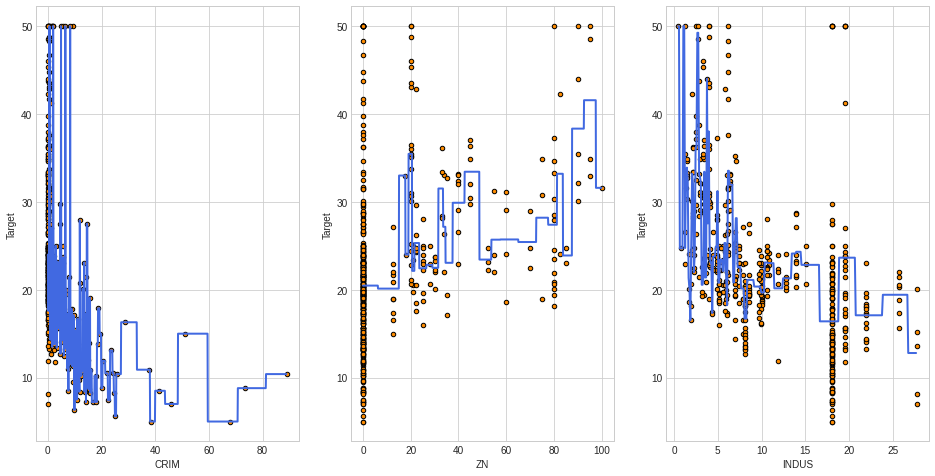

In [92]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([0,1,2]):
  X = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = DecisionTreeRegressor()
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k', c='darkorange', label='data')
  plt.plot(X_test, predict, color = 'royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

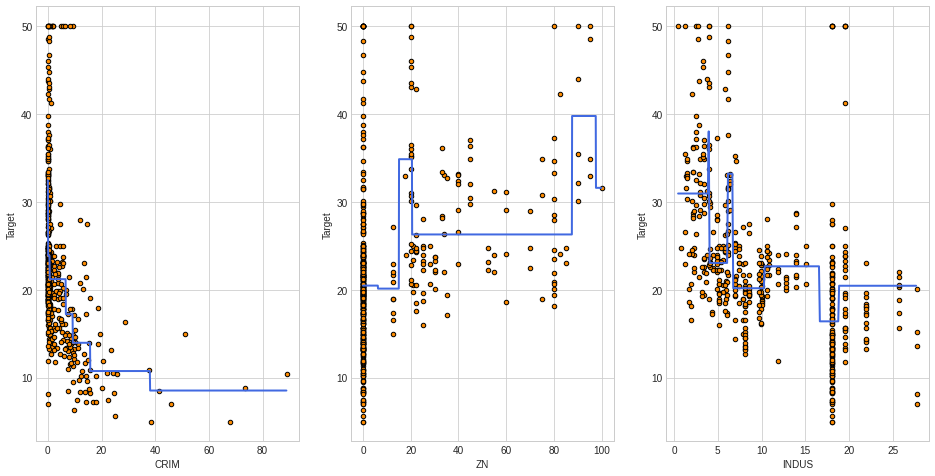

In [93]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([0,1,2]):
  X = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = DecisionTreeRegressor(max_depth=3)
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k', c='darkorange', label='data')
  plt.plot(X_test, predict, color = 'royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [94]:
model = DecisionTreeRegressor()

In [95]:
cross_val_score(estimator = model, X = diabetes.data, y = diabetes.target, cv=5, n_jobs=multiprocessing.cpu_count())

array([-0.54202997, -0.08427354, -0.06075756,  0.02927534, -0.16563711])

##### 전처리 후 학습

In [96]:
model = make_pipeline(StandardScaler(), DecisionTreeRegressor())

In [97]:
cross_val_score(estimator = model, X = diabetes.data, y = diabetes.target, cv=5, n_jobs=multiprocessing.cpu_count())

array([-0.39805937,  0.00734   , -0.09960602, -0.09607567, -0.18714663])

#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

In [100]:
model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

print(tree.export_text(model, feature_names=diabetes.feature_names))

|--- s5 <= -0.00
|   |--- bmi <= 0.01
|   |   |--- s3 <= 0.02
|   |   |   |--- s1 <= 0.06
|   |   |   |   |--- sex <= 0.00
|   |   |   |   |   |--- bp <= -0.03
|   |   |   |   |   |   |--- age <= -0.05
|   |   |   |   |   |   |   |--- bp <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- bp >  -0.09
|   |   |   |   |   |   |   |   |--- bp <= -0.05
|   |   |   |   |   |   |   |   |   |--- bp <= -0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |   |--- bp >  -0.07
|   |   |   |   |   |   |   |   |   |   |--- s2 <= -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- s2 >  -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- bp >  -0.05
|   |   |   |   |   |   |   |   |   |--- s5 <= -0.05
|   |   |   |   |   |   |   |   |   |   |--- value: [134.00]
|   |   |

##### plot_tree를 사용한 시각화

[Text(0.5315926987137203, 0.9761904761904762, 'X[8] <= -0.004\nsquared_error = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(0.3052811675461741, 0.9285714285714286, 'X[2] <= 0.006\nsquared_error = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(0.2040649736147757, 0.8809523809523809, 'X[6] <= 0.021\nsquared_error = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(0.11345646437994723, 0.8333333333333334, 'X[4] <= 0.063\nsquared_error = 2856.847\nsamples = 87\nvalue = 108.805'),
 Text(0.08759894459102903, 0.7857142857142857, 'X[1] <= 0.003\nsquared_error = 2496.899\nsamples = 85\nvalue = 105.682'),
 Text(0.04221635883905013, 0.7380952380952381, 'X[3] <= -0.035\nsquared_error = 2955.72\nsamples = 39\nvalue = 118.846'),
 Text(0.02295514511873351, 0.6904761904761905, 'X[0] <= -0.051\nsquared_error = 2357.959\nsamples = 21\nvalue = 100.429'),
 Text(0.008443271767810026, 0.6428571428571429, 'X[3] <= -0.092\nsquared_error = 2049.0\nsamples = 8\nvalue = 133.5'),
 Text(0.0063324538258575196

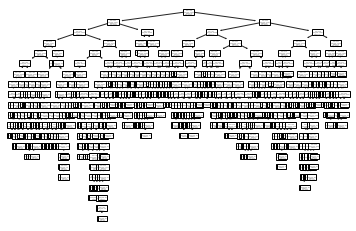

In [101]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

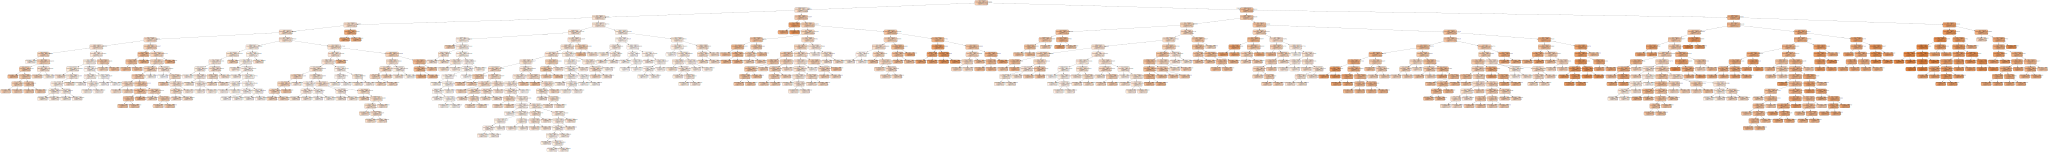

In [103]:
dot_data = tree.export_graphviz(decision_tree=model, feature_names=diabetes.feature_names,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

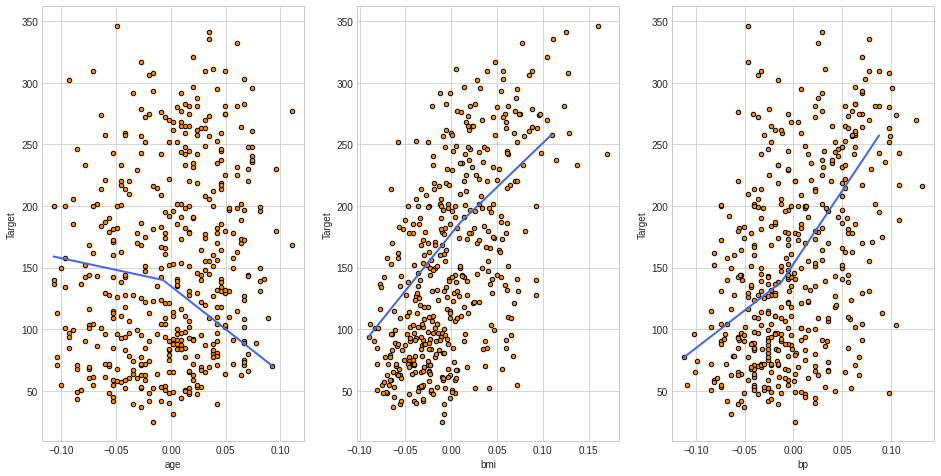

In [105]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([0,2,3]):
  X = diabetes.data[:, pair].reshape(-1, 1)
  y = diabetes.target

  model = DecisionTreeRegressor()
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k', c='darkorange', label='data')
  plt.plot(X_test, predict, color = 'royalblue', linewidth=2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

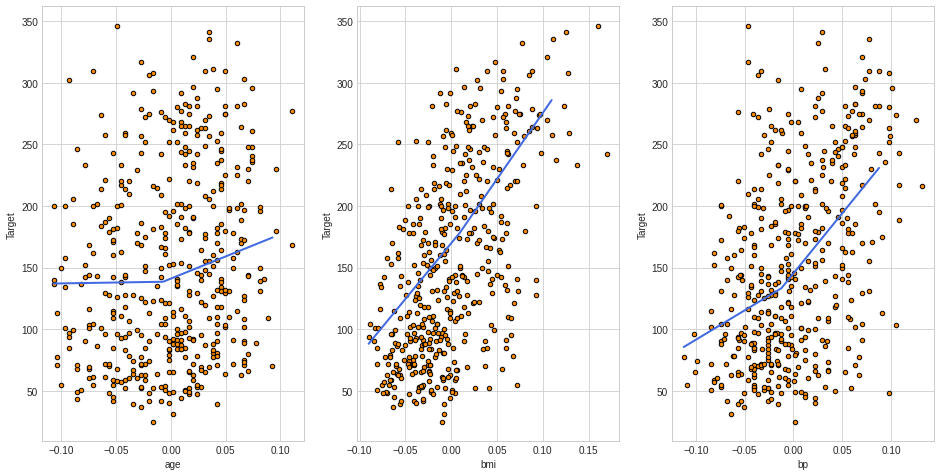

In [106]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([0,2,3]):
  X = diabetes.data[:, pair].reshape(-1, 1)
  y = diabetes.target

  model = DecisionTreeRegressor(max_depth=3)
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k', c='darkorange', label='data')
  plt.plot(X_test, predict, color = 'royalblue', linewidth=2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')